In [19]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [20]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [21]:
data = pd.read_excel('data.xlsx', sheet_name="Çorum", index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2004,247,22886.5000,12982.77,410.8500,9.3,6.7,0.4,-2.1,-4.6,-3.6,...,74.2,30.7,16.1,69.4,75.6,22.0,20.1,55.2,55.5,87.2
2005,252,22202.7300,13583.24,447.4600,7.0,5.5,-0.8,-3.5,-3.0,-3.7,...,3.2,13.1,46.3,10.1,23.3,14.8,91.0,56.9,38.8,21.8
2006,206,23399.1500,13176.08,587.4900,9.0,4.1,0.2,-2.7,-7.1,-5.9,...,21.8,36.7,50.3,12.9,40.0,60.3,57.4,17.5,54.0,36.1
2007,157,20571.7500,9902.17,558.0200,10.2,7.3,-1.2,-6.8,-3.9,-4.9,...,84.0,31.4,24.1,6.0,21.8,18.4,42.3,28.2,41.7,105.8
2008,215,16644.6101,6428.13,1034.2342,9.5,6.0,0.9,-2.6,-11.0,-8.0,...,6.8,28.8,60.3,34.5,22.5,10.2,44.0,33.2,55.2,46.2


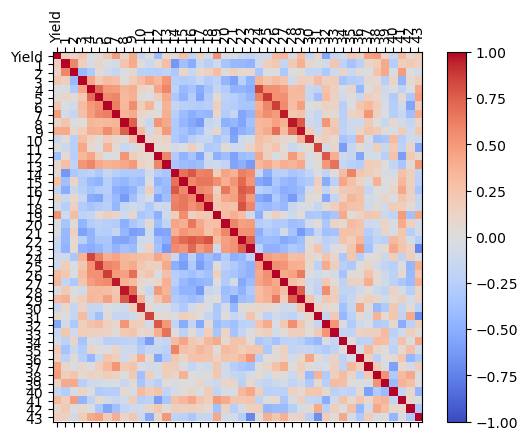

In [22]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

On this example, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

In [23]:
corr

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Yield,1.000000,0.157496,0.112422,0.230479,-0.026431,0.030554,0.221791,0.476414,0.100044,0.400754,...,-0.087620,0.210032,0.138213,0.452800,0.481571,0.115059,-0.139494,0.314929,0.089629,0.156833
1,0.157496,1.000000,0.585780,0.159294,-0.032609,0.112180,-0.026790,-0.062917,0.236589,0.399566,...,-0.215667,-0.358859,-0.229479,0.095002,0.171166,0.412955,-0.269269,0.166501,0.196713,0.140127
2,0.112422,0.585780,1.000000,-0.423110,-0.292183,0.049767,-0.092801,-0.171370,-0.021797,0.091033,...,0.104157,-0.131892,0.025446,-0.015799,0.246131,0.409801,-0.051888,0.478274,-0.022400,-0.092840
3,0.230479,0.159294,-0.423110,1.000000,0.430628,0.205176,0.299674,0.275675,0.015952,0.172641,...,-0.350723,-0.271737,-0.235587,0.083074,0.057399,-0.257054,0.115256,-0.455611,0.072501,0.179567
4,-0.026431,-0.032609,-0.292183,0.430628,1.000000,0.701849,0.493615,0.470585,0.336686,0.390667,...,-0.039834,0.105035,-0.442105,-0.022716,0.147183,-0.101817,-0.019416,-0.197279,-0.023772,0.408241
5,0.030554,0.112180,0.049767,0.205176,0.701849,1.000000,0.568892,0.593033,0.319290,0.377876,...,-0.077812,0.010890,-0.143037,0.169241,0.111224,-0.092307,-0.281254,0.056241,-0.319952,0.458436
6,0.221791,-0.026790,-0.092801,0.299674,0.493615,0.568892,1.000000,0.622340,0.320322,0.559461,...,-0.250213,-0.019084,0.238909,0.319344,0.180043,-0.047750,-0.258920,-0.071001,-0.551350,0.192419
7,0.476414,-0.062917,-0.171370,0.275675,0.470585,0.593033,0.622340,1.000000,0.350419,0.402893,...,-0.238930,0.117525,0.167771,0.521894,0.136477,-0.030625,-0.265494,-0.145569,-0.375304,0.391599
8,0.100044,0.236589,-0.021797,0.015952,0.336686,0.319290,0.320322,0.350419,1.000000,0.742402,...,-0.220876,-0.103911,-0.104462,0.202388,0.006598,-0.148237,0.060614,-0.086704,-0.166263,0.111823
9,0.400754,0.399566,0.091033,0.172641,0.390667,0.377876,0.559461,0.402893,0.742402,1.000000,...,-0.203540,-0.115498,0.104654,0.255550,0.207544,0.028685,-0.054122,0.187472,-0.111490,0.233606


In [24]:
import pmdarima as pm


In [25]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame()

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [26]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

C:\Users\Cevher\AppData\Local\Temp\ipykernel_12292\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -11.148069
p-value: 0.000000
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: 0.264376
p-value: 0.975650
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Non-stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: -1.233682
p-value: 0.658941
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Non-stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -1.818435
p-value: 0.371348
Critical Values:
	1%: -3.859
	5%: -3.042
	10%: -2.661
Non-stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -3.293314
p-value: 0.015180
Critical Values:
	1%: -3.859
	5%: -3

In [27]:
data = data.diff(1)
data = data.dropna()
data.head()


,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2005,5.0,-683.7700,600.470,36.6100,-2.3,-1.2,-1.2,-1.4,1.6,-0.1,...,-71.0,-17.6,30.2,-59.3,-52.3,-7.2,70.9,1.7,-16.7,-65.4
2006,-46.0,1196.4200,-407.160,140.0300,2.0,-1.4,1.0,0.8,-4.1,-2.2,...,18.6,23.6,4.0,2.8,16.7,45.5,-33.6,-39.4,15.2,14.3
2007,-49.0,-2827.4000,-3273.910,-29.4700,1.2,3.2,-1.4,-4.1,3.2,1.0,...,62.2,-5.3,-26.2,-6.9,-18.2,-41.9,-15.1,10.7,-12.3,69.7
2008,58.0,-3927.1399,-3474.040,476.2142,-0.7,-1.3,2.1,4.2,-7.1,-3.1,...,-77.2,-2.6,36.2,28.5,0.7,-8.2,1.7,5.0,13.5,-59.6
2009,40.0,7348.4069,5442.506,-589.4542,1.1,0.0,0.0,-0.4,7.7,8.0,...,60.0,-7.7,-10.1,1.0,45.1,62.3,-9.5,77.0,4.4,27.0


In [28]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -4.142026
p-value: 0.000825
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: -5.217567
p-value: 0.000008
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: -2.079686
p-value: 0.252761
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Non-stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -58.906567
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -4.705623
p-value: 0.000082
Critical Values:
	1%: -3.924
	5%: -3.068
	1

C:\Users\Cevher\AppData\Local\Temp\ipykernel_12292\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [29]:
# scaler = MinMaxScaler()
# data = data['Yield'].to_numpy()
# data = data.reshape(-1, 1)
# scaler.fit(data)
# sonuc = scaler.transform(data)

for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_12292\4229674204.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [30]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2005,0.394495,0.467305,0.483456,0.587485,0.168224,0.441441,0.273504,0.371795,0.587838,0.409722,...,0.041472,0.349781,0.717786,0.128680,0.129393,0.361213,1.000000,0.422546,0.414573,0.191774
2006,0.160550,0.571671,0.375963,0.684532,0.570093,0.423423,0.461538,0.512821,0.202703,0.263889,...,0.640803,0.607121,0.480036,0.650967,0.680511,0.845588,0.232182,0.107362,0.574874,0.572932
2007,0.146789,0.348317,0.070141,0.525477,0.495327,0.837838,0.256410,0.198718,0.695946,0.486111,...,0.932441,0.426608,0.205989,0.569386,0.401757,0.042279,0.368112,0.491564,0.436683,0.837877
2008,0.637615,0.287272,0.048792,1.000000,0.317757,0.432432,0.555556,0.730769,0.000000,0.201389,...,0.000000,0.443473,0.772232,0.867115,0.552716,0.352022,0.491550,0.447853,0.566332,0.219512
2009,0.555046,0.913156,1.000000,0.000000,0.485981,0.549550,0.376068,0.435897,1.000000,0.972222,...,0.917726,0.411618,0.352087,0.635828,0.907348,1.000000,0.409258,1.000000,0.520603,0.633668


In [31]:
train = data[:15]
test = data[15:]

In [32]:
arima = pm.auto_arima(train['Yield'],X=train.drop(columns=['Yield']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-151.448, Time=3.05 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=-187.420, Time=0.53 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-181.148, Time=1.48 sec


C:\Users\Cevher\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,2,1)(0,0,1)[4]             : AIC=-182.971, Time=0.36 sec
 ARIMA(0,2,0)(1,0,0)[4]             : AIC=-184.541, Time=1.10 sec
 ARIMA(0,2,0)(0,0,1)[4]             : AIC=-185.420, Time=0.64 sec
 ARIMA(0,2,0)(1,0,1)[4]             : AIC=-183.420, Time=0.71 sec
 ARIMA(1,2,0)(0,0,0)[4]             : AIC=-184.855, Time=0.90 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=-184.937, Time=0.31 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=-182.870, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[4] intercept   : AIC=-185.380, Time=0.50 sec

Best model:  ARIMA(0,2,0)(0,0,0)[4]          
Total fit time: 9.927 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 137.710
Date:                Sat, 24 Jun 2023   AIC                           -187.420
Time:                        15:08:18   BIC                           -162.562


In [33]:
pred=arima.predict(n_periods=3, X=test.drop(columns=['Yield']), alpha=0.05)
pred

C:\Users\Cevher\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


15    0.571369
16    0.289727
17    0.446608
dtype: float64

In [34]:
test

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
2020,0.376147,0.933147,0.507246,0.690783,0.252336,0.513514,0.222222,0.461538,0.479730,0.340278,...,0.463545,0.156152,0.445554,0.258200,0.349840,0.561581,0.423953,0.241564,0.395477,0.515065
2021,0.000000,0.000000,0.125571,0.652882,1.000000,0.990991,0.615385,0.583333,0.709459,0.479167,...,0.486288,0.440350,0.261343,0.248108,0.560703,0.057904,0.875827,0.361963,0.396482,0.411765
2022,1.000000,0.494733,0.542290,0.737703,0.000000,0.117117,0.487179,0.371795,0.209459,0.375000,...,0.717726,0.500937,0.632486,0.889823,1.000000,0.614890,0.316679,0.490031,0.475879,0.475371


In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


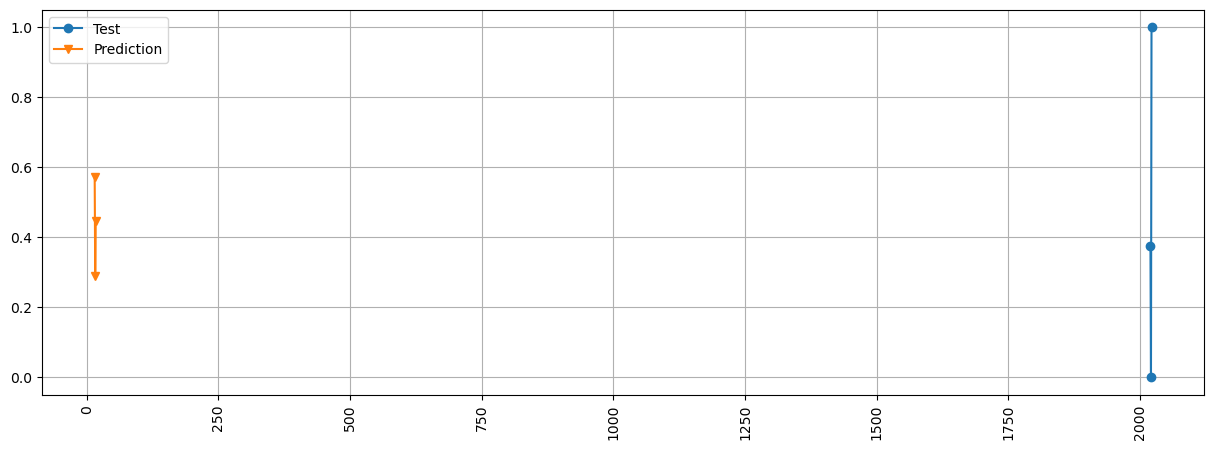

Mean Absolute  Error 0.3461135668508344
Mean Squared Error 0.14276523676404787
RMSE 0.37784287311533066
AIC values -187.419987757637


In [36]:
plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(test['Yield'], marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_error(test['Yield'], pred)
print("Mean Absolute  Error", mape)
print("="*50)
mse=mean_squared_error(test['Yield'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)
